## RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique. You can use it to identify high-value customers in a banking context based on:

**Recency: How recently a customer used banking services.**

**Frequency: How often they used services or made transactions.**

**Monetary: How much money they deposited, invested, or spent.**

In [1]:
#import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
#READ THE FILE
bank = pd.read_csv("../data/bank_data_C.csv")

In [3]:
bank.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [4]:
#Statistics of the data
bank.describe(include='all')

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1041614,1041614,1041614,1041614,1.041614e+06,1041614,1.041614e+06,1.041614e+06
unique,1041614,879358,17233,3,9275,NaN,55,NaN,NaN
top,T1,C5533885,1/1/1800,M,MUMBAI,NaN,7/8/16,NaN,NaN
freq,1,6,56292,760978,101997,NaN,27084,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.149986e+05,NaN,1.571221e+05,1.566096e+03
std,NaN,NaN,NaN,NaN,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,4.728140e+03,NaN,1.240410e+05,1.600000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.676852e+04,NaN,1.642470e+05,4.575000e+02
75%,NaN,NaN,NaN,NaN,NaN,5.742885e+04,NaN,2.000220e+05,1.200000e+03


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


# Data cleaning and preprocessing

In [6]:
bank.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [7]:
bank["CustomerDOB"] = bank["CustomerDOB"].astype(str).str.replace("-", "/")
bank["CustomerDOB"] = pd.to_datetime(bank["CustomerDOB"], format="%d/%m/%y", errors='coerce')
bank["TransactionDate"] = pd.to_datetime(bank["TransactionDate"], format = '%d/%m/%y')

In [8]:

# Create 'Age' column from CustomerDOB
today = pd.to_datetime("today")
bank['Age'] = (today - bank['CustomerDOB']).dt.days // 365

In [10]:
bank.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,31.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,-32.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,28.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,51.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,37.0


In [11]:
# View rows with negative ages
bank[bank['Age'] < 0]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.00,-32.0
15,T16,C8334633,2068-07-10,F,NEW DELHI,1283.12,2016-08-01,125725,250.00,-44.0
29,T31,C7648712,2067-01-21,F,NEW DELHI,298461.05,2016-08-03,160642,500.00,-42.0
50,T52,C6637047,2066-07-25,M,PUNE,9956.49,2016-08-05,133141,145.00,-42.0
78,T80,C6612422,2067-05-25,M,DELHI,257966.29,2016-08-01,204252,195.64,-43.0
...,...,...,...,...,...,...,...,...,...,...
1041542,T1048496,C1733617,2062-09-01,F,BHIWADI,7724.64,2016-09-18,181547,296.00,-38.0
1041543,T1048497,C1427177,2067-05-07,F,NAGPUR,7597.12,2016-09-18,181741,1736.00,-43.0
1041547,T1048501,C1619019,2051-07-01,M,THANE,42695.04,2016-09-18,182122,1465.00,-27.0
1041557,T1048511,C3429427,2048-07-15,M,HOWRAH,416244.74,2016-09-18,184959,1695.00,-24.0


In [12]:
# View rows with very high ages (e.g., over 100)
bank[bank['Age'] > 100]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age


In [14]:

# Keep only rows where age is between 1 and 100
bank = bank[(bank['Age'] > 0) & (bank['Age'] <= 100)]

In [15]:
bank[bank['Age'] < 18]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
387,T391,C4417679,2021-01-19,M,NEW DELHI,1125922.25,2016-10-21,202654,4570.00,4.0
1324,T1329,C6417656,2021-01-19,M,NEW DELHI,1125922.25,2016-10-21,192755,6300.00,4.0
1662,T1668,C4217631,2021-01-19,M,NEW DELHI,1125922.25,2016-10-21,195748,2460.00,4.0
5465,T5492,C1213940,2007-12-02,M,CHANDAULI,17728.06,2016-09-22,61944,11499.00,17.0
8129,T8174,C1017880,2013-02-20,M,DELHI,20257.22,2016-09-25,191750,359.52,12.0
...,...,...,...,...,...,...,...,...,...,...
1001765,T1008538,C3017630,2021-01-19,M,NEW DELHI,1125922.25,2016-09-13,212632,4285.00,4.0
1012982,T1019804,C4420589,2014-01-13,M,GHAZIABAD,751220.52,2016-09-13,203924,1849.00,11.0
1015616,T1022448,C4825367,2008-05-12,F,NEW DELHI,79984.60,2016-09-13,185905,285.00,17.0
1028779,T1035679,C8528348,2012-03-07,M,NASHIK,26000.92,2016-09-13,102620,570.00,13.0


In [16]:
# Keep only rows where age is between 18 and 100
bank = bank[(bank['Age'] >= 18) & (bank['Age'] <= 100)]

In [17]:
bank[bank['Age'] < 18]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age


In [18]:
# Keep only rows where age is between 18 and 100
bank = bank[(bank['Age'] >= 18) & (bank['Age'] <= 100)]

In [19]:
bank[bank['Age'] < 18]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age


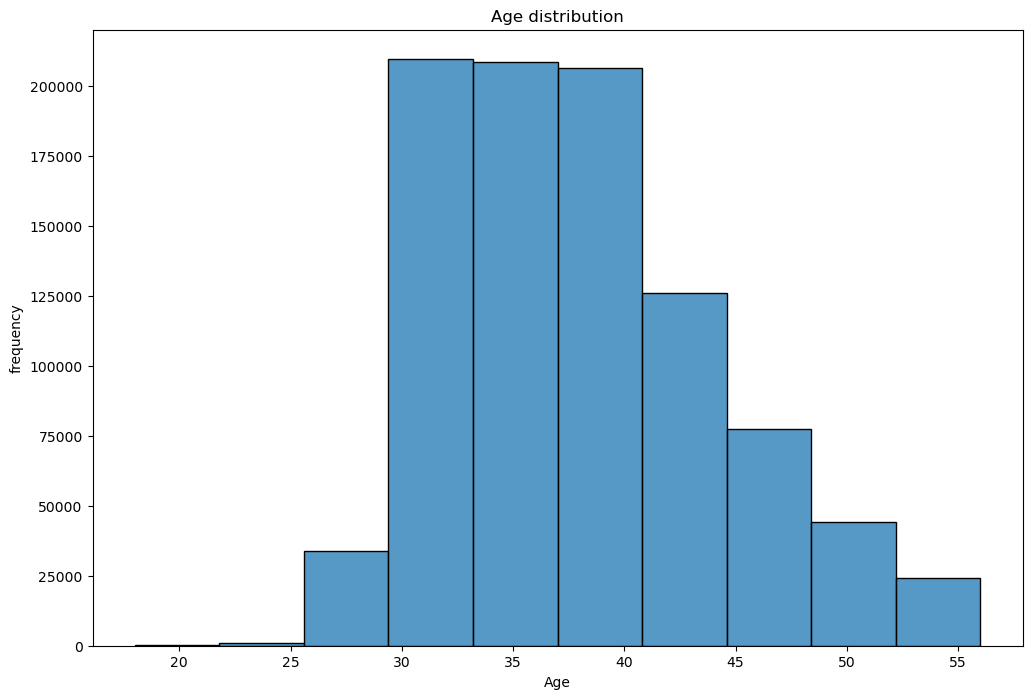

In [20]:
#further observation
plt.figure(figsize=(12,8))
sns.histplot(bank["Age"], bins = 10, kde=False)
plt.xlabel("Age")
plt.ylabel("frequency")
plt.title("Age distribution")
plt.show()

In [22]:
bank["CustGender"].value_counts()

CustGender
M    673718
F    257299
Name: count, dtype: int64

In [23]:
bank["CustGender"] =  bank["CustGender"].replace('T','M')

In [24]:
bank["CustGender"].value_counts()

CustGender
M    673718
F    257299
Name: count, dtype: int64

In [25]:
#Location
bank["CustLocation"].value_counts()

CustLocation
MUMBAI                92381
BANGALORE             74489
NEW DELHI             70161
GURGAON               66864
DELHI                 63565
                      ...  
DHANSOR                   1
(W) S V RD MUMBAI         1
NEW PANVEL RAIGARH        1
TRIPURA TELIAMURA         1
IMPERIA THANE WEST        1
Name: count, Length: 7820, dtype: int64

In [26]:
#Account balance
bank["CustAccountBalance"].sort_values(ascending = True)

376942            0.00
616601            0.00
113494            0.00
810582            0.00
50538             0.00
              ...     
635969     42331376.94
629959     42331376.94
635484     42331376.94
1041135    43165555.53
744124     61382213.47
Name: CustAccountBalance, Length: 931017, dtype: float64

In [27]:
bank[bank["TransactionAmount (INR)"] == 0].value_counts().sum()

655

In [28]:
bank.drop(bank[bank["TransactionAmount (INR)"] ==0].index.tolist(), axis = 0, inplace = True)

In [29]:
bank[bank["TransactionAmount (INR)"] == 0].value_counts().sum()

0

In [30]:
bank.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,31.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,28.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,51.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,37.0
5,T6,C1536588,1972-10-08,F,ITANAGAR,53609.20,2016-08-02,173940,676.0,52.0


In [31]:
bank.to_csv("../output/cleaned_bank_data.csv", index=False)